In [1]:
import pandas as pd

In [2]:
from google.colab import files
  
  
rat = files.upload()

Saving Rating_Prediction_final.csv to Rating_Prediction_final.csv


In [3]:
import pandas as pd
import io
  
rat = pd.read_csv('Rating_Prediction_final.csv')
print(rat)

                                                 reviews  ratings
0      Camera is not that good but the performance wi...        4
1      Best for high end graphic games. PUBG is avail...        4
2                                  Best quality products        5
3                         Value for money..... but heavy        5
4      Camera quality & performance is good.. feature...        4
...                                                  ...      ...
35709                                         Nice phone        3
35710                                 Superb quality ❤️👍        5
35711                                  Value for money 💰        5
35712                               Worst battery pickup        1
35713                                  Very nice product        5

[35714 rows x 2 columns]


In [4]:
rat.isnull().sum()

reviews    0
ratings    0
dtype: int64

Fortunately there is no null values present in the data.

### **Text Preprocessing**

The preprocessing involves following changes:

1) URLs, as the people tend to spam the section with irrelevant urls, we need to get rid of those for better modelling.

2) Numbers and Punctuation: We don't need those as they hardly add up any info in the end.

3) Converting the text into lowercase as it will bring the uniform nature to it.

4) Tokenize the data to:

    i) Remove stopwords (The words which don't add up anymore than the rest.)

    ii) Stemming and Lammatization (Methods to reduce the noise and extra info from the data)

    iii) Remove the words having length <= 2

5) Convert the list of tokens into back to the string

### 1) Removing URLs

In [5]:
import re

def clean_url(review_text):
    return re.sub(r'http\S+', '', review_text) #The format of the websites are cliche, those can be removed if we figure how they are structured in general.

rat['cleanreview'] = rat['reviews'].apply(clean_url)

### **2) Numbers and Punctuations off the data**

In [6]:
def cleandata(review_text):
    return re.sub('[^a-zA-Z]', ' ', review_text) #It removes [!”#$%...] such punctuations and [0-9] numbers

rat['cleanreview'] = rat['cleanreview'].apply(cleandata)

In [7]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,Camera is not that good but the performance wi...
1,Best for high end graphic games. PUBG is avail...,4,Best for high end graphic games PUBG is avail...
2,Best quality products,5,Best quality products
3,Value for money..... but heavy,5,Value for money but heavy
4,Camera quality & performance is good.. feature...,4,Camera quality performance is good feature...
...,...,...,...
35709,Nice phone,3,Nice phone
35710,Superb quality ❤️👍,5,Superb quality
35711,Value for money 💰,5,Value for money
35712,Worst battery pickup,1,Worst battery pickup


The emojis, punctuations are clearly gone above, the former are replaced with the spaces.

### 3) Convert to LowerCase

In [8]:
def lowercase(review_text):
    return str(review_text).lower()

rat['cleanreview'] = rat['cleanreview'].apply(lowercase)

In [9]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,camera is not that good but the performance wi...
1,Best for high end graphic games. PUBG is avail...,4,best for high end graphic games pubg is avail...
2,Best quality products,5,best quality products
3,Value for money..... but heavy,5,value for money but heavy
4,Camera quality & performance is good.. feature...,4,camera quality performance is good feature...
...,...,...,...
35709,Nice phone,3,nice phone
35710,Superb quality ❤️👍,5,superb quality
35711,Value for money 💰,5,value for money
35712,Worst battery pickup,1,worst battery pickup


All the capital letters have been converted to lower case.

In [10]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 4) Tokenization

In [11]:
import nltk
from nltk.tokenize import word_tokenize

def token(review_text):
    return word_tokenize(review_text)

rat['cleanreview'] = rat['cleanreview'].apply(token)

In [12]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,"[camera, is, not, that, good, but, the, perfor..."
1,Best for high end graphic games. PUBG is avail...,4,"[best, for, high, end, graphic, games, pubg, i..."
2,Best quality products,5,"[best, quality, products]"
3,Value for money..... but heavy,5,"[value, for, money, but, heavy]"
4,Camera quality & performance is good.. feature...,4,"[camera, quality, performance, is, good, featu..."
...,...,...,...
35709,Nice phone,3,"[nice, phone]"
35710,Superb quality ❤️👍,5,"[superb, quality]"
35711,Value for money 💰,5,"[value, for, money]"
35712,Worst battery pickup,1,"[worst, battery, pickup]"


We've split the review text into seperate words called as tokens.

### i) Removing Stopwords

In [13]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleantext(token):
    return [word for word in token if word not in stop_words]

rat['cleanreview'] = rat['cleanreview'].apply(cleantext)

In [15]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,"[camera, good, performance, wise, display, goo..."
1,Best for high end graphic games. PUBG is avail...,4,"[best, high, end, graphic, games, pubg, availa..."
2,Best quality products,5,"[best, quality, products]"
3,Value for money..... but heavy,5,"[value, money, heavy]"
4,Camera quality & performance is good.. feature...,4,"[camera, quality, performance, good, features,..."
...,...,...,...
35709,Nice phone,3,"[nice, phone]"
35710,Superb quality ❤️👍,5,"[superb, quality]"
35711,Value for money 💰,5,"[value, money]"
35712,Worst battery pickup,1,"[worst, battery, pickup]"


stop_words :

{'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}​

All the above words are removed from our dataset, cause they don't add up any extra meaning to the already retained one.

### ii) Stemming and Lemmatization

To put things straight and simple:

Stemming: It is a direct and raw process which does not go by the dictionary while it perfroms its action on the tokens. The processed tokens do not really mean anything in the end but it makes sure to rip the long words into short.

Lemmatization: It is a time taking process but it is well composed and goes by the dictionary. Post-processed tokens do mean something in the end.

We'd use Lemmatization as it yield a sensible and reilable result in the end comparatively.

In [16]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def cleantext(token):
    return [lemma.lemmatize(word = w, pos = 'v') for w in token] #POS = Parts of speach, 'v' = verb.

rat['cleanreview'] = rat['cleanreview'].apply(cleantext)

In [18]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,"[camera, good, performance, wise, display, goo..."
1,Best for high end graphic games. PUBG is avail...,4,"[best, high, end, graphic, game, pubg, availab..."
2,Best quality products,5,"[best, quality, products]"
3,Value for money..... but heavy,5,"[value, money, heavy]"
4,Camera quality & performance is good.. feature...,4,"[camera, quality, performance, good, feature, ..."
...,...,...,...
35709,Nice phone,3,"[nice, phone]"
35710,Superb quality ❤️👍,5,"[superb, quality]"
35711,Value for money 💰,5,"[value, money]"
35712,Worst battery pickup,1,"[worst, battery, pickup]"


The column 'cleanreview' clearly got rid of the words which are nothing but a burden. Now it only has which makes sense.

### iii) Remove the words having length <= 2

There is a chance of having a single letter like 'a', 'I'.. which donot add up much in the end.

In [19]:
def clean_length(token):
    return [word for word in token if len(word)>2]

rat['cleanreview'] = rat['cleanreview'].apply(clean_length)

In [20]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,"[camera, good, performance, wise, display, goo..."
1,Best for high end graphic games. PUBG is avail...,4,"[best, high, end, graphic, game, pubg, availab..."
2,Best quality products,5,"[best, quality, products]"
3,Value for money..... but heavy,5,"[value, money, heavy]"
4,Camera quality & performance is good.. feature...,4,"[camera, quality, performance, good, feature, ..."
...,...,...,...
35709,Nice phone,3,"[nice, phone]"
35710,Superb quality ❤️👍,5,"[superb, quality]"
35711,Value for money 💰,5,"[value, money]"
35712,Worst battery pickup,1,"[worst, battery, pickup]"


### 5) Snitching the tokens back to the string.

In [21]:
def convert(review):
    return ' '.join(review)

rat['cleanreview'] = rat['cleanreview'].apply(convert)

In [22]:
rat

,reviews,ratings,cleanreview
0,Camera is not that good but the performance wi...,4,camera good performance wise display good over...
1,Best for high end graphic games. PUBG is avail...,4,best high end graphic game pubg available till...
2,Best quality products,5,best quality products
3,Value for money..... but heavy,5,value money heavy
4,Camera quality & performance is good.. feature...,4,camera quality performance good feature nice s...
...,...,...,...
35709,Nice phone,3,nice phone
35710,Superb quality ❤️👍,5,superb quality
35711,Value for money 💰,5,value money
35712,Worst battery pickup,1,worst battery pickup


Now the data is properly has undergone the preprocessing procedure, it is now ready for building a model.

In [23]:
rat.drop(['reviews'], axis = 1, inplace = True)

We've removed the raw 'review' column to model the rest of the data.

In [24]:
rat

,ratings,cleanreview
0,4,camera good performance wise display good over...
1,4,best high end graphic game pubg available till...
2,5,best quality products
3,5,value money heavy
4,4,camera quality performance good feature nice s...
...,...,...
35709,3,nice phone
35710,5,superb quality
35711,5,value money
35712,1,worst battery pickup


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'ratings')

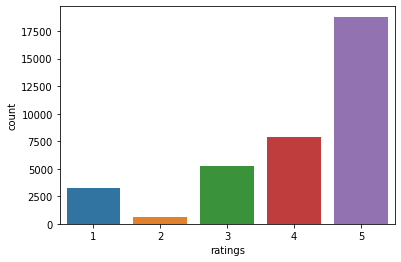

In [26]:
sns.countplot(rat.ratings)
plt.xlabel('ratings')

The plot shows that the distribution is imblalanced thus, we shall assign negative, neutral and positive sentiments to <3, =3, >3 respectively.

In [27]:
# replacing numerical values with categorical values to reduce the classes to sentiments

rat['sentiment'] = rat.ratings.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

### Data Split

In [28]:
##Creating Train and Test datasets

X_data = rat['cleanreview']
y_data = rat['sentiment']

In [29]:
# changing the datatype from object to string

X_data = X_data.astype(str)

In [30]:
X_data

0        camera good performance wise display good over...
1        best high end graphic game pubg available till...
2                                    best quality products
3                                        value money heavy
4        camera quality performance good feature nice s...
                               ...                        
35709                                           nice phone
35710                                       superb quality
35711                                          value money
35712                                 worst battery pickup
35713                                         nice product
Name: cleanreview, Length: 35714, dtype: object

In [31]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,camera good performance wise display good over...
1,best high end graphic game pubg available till...
2,best quality products
3,value money heavy
4,camera quality performance good feature nice s...


Since the reviews are converted to string datatype, we'll then convert it into numerical so that the machine can model the data.

We use CountVector and TfidfTransoformer to breakdown the texts and then coverting those numerical form.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv=CountVectorizer()

x_train_trans1=cv.fit_transform(X_data).toarray()

tfidf = TfidfTransformer()

x_final_trans = tfidf.fit_transform(x_train_trans1).toarray()

In [33]:
from sklearn.model_selection import train_test_split
seed = 4353

X_train,X_test,y_train,y_test=train_test_split(x_final_trans,y_data,random_state = seed,test_size=0.2)

## Model Selection

### Multinomial Naive Bayes

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import xgboost as xgb
seed = 4353

In [36]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [37]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.91      0.74      0.82       790
     neutral       0.92      0.36      0.51      1085
    positive       0.86      0.99      0.92      5268

    accuracy                           0.87      7143
   macro avg       0.90      0.70      0.75      7143
weighted avg       0.87      0.87      0.85      7143

[[ 586    4  200]
 [  40  386  659]
 [  16   28 5224]]
Accuracy :  86.74  %
f1_score :  0.847


### XGBoost

In [38]:
# Instantiation, fitting and predictions

xgb_ = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000, #No.of trees.
 max_depth=5,   #Depth of each tree.
 min_child_weight=1,
 gamma=0,    #It is set to default 0 as in no regularization.
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',     #Output has 3 classifications, softmax used in multi-classification models. 
 nthread=4,          #No.of CPU threads. 
 scale_pos_weight=1,
 seed= seed)

xgb_.fit(X_train, y_train)
predictions = xgb_.predict(X_test)

In [40]:
# Model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

xgb_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
xgb_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , xgb_accuracy , " %")
print("f1_score : " , xgb_f1)

              precision    recall  f1-score   support

    negative       0.90      0.84      0.87       790
     neutral       0.86      0.73      0.79      1085
    positive       0.94      0.98      0.96      5268

    accuracy                           0.92      7143
   macro avg       0.90      0.85      0.87      7143
weighted avg       0.92      0.92      0.92      7143

[[ 660   25  105]
 [  52  795  238]
 [  24  106 5138]]
Accuracy :  92.3  %
f1_score :  0.921


### Random Forest

In [41]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [42]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.88      0.82      0.85       790
     neutral       0.89      0.73      0.80      1085
    positive       0.93      0.98      0.95      5268

    accuracy                           0.92      7143
   macro avg       0.90      0.84      0.87      7143
weighted avg       0.92      0.92      0.92      7143

[[ 648   16  126]
 [  50  791  244]
 [  41   85 5142]]
Accuracy :  92.13  %
f1_score :  0.919


## LSTM - Neural Networks

We can apply Sequential API on the data and find out the accuracy for each iteration (EPOCH).
This neural network concept comes in handy when we there's a huge data to process.

In [34]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4459, 32)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (28571, 3)


In [ ]:
#train the model
model.fit(X_train, y_train_dummies, epochs=5, batch_size=32)

The accuracy of LSTM using Sequentical API gives it around 0.75 which is equal to 75%.

# Final Model - The one which has a better accuracy score.

XGBoost with the right hyperparameters involved, has give the accuracy score of 92.3%.

This model can predict the rating of about 92.3% correctly.

Random Forest has the second best score of 92.13%.